In [ ]:
'''Project Title (suggested):
Hospital Readmission & Length of Stay Analysis using Python

Dataset:
Hospital patient data (30k records) including:
Age
Gender
Length of Stay (LOS)
BMI
Medications
30-day Readmission status

Objective:
To analyze patient stay duration, readmission patterns, and identify factors affecting hospital efficiency.'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_101_hospital_readmissions_30k.csv")
df

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,41,Male,158/85,259,34.1,No,No,10,10,Home,Yes
96,97,80,Male,143/100,275,34.7,No,No,7,7,Nursing_Facility,Yes
97,98,60,Other,110/100,235,26.7,No,Yes,4,4,Rehab,No
98,99,42,Male,116/99,297,38.0,Yes,Yes,5,4,Home,No


In [ ]:
df.head(5)

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No


In [ ]:
df.columns

Index(['patient_id', 'age', 'gender', 'blood_pressure', 'cholesterol', 'bmi',
       'diabetes', 'hypertension', 'medication_count', 'length_of_stay',
       'discharge_destination', 'readmitted_30_days'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             100 non-null    int64  
 1   age                    100 non-null    int64  
 2   gender                 100 non-null    object 
 3   blood_pressure         100 non-null    object 
 4   cholesterol            100 non-null    int64  
 5   bmi                    100 non-null    float64
 6   diabetes               100 non-null    object 
 7   hypertension           100 non-null    object 
 8   medication_count       100 non-null    int64  
 9   length_of_stay         100 non-null    int64  
 10  discharge_destination  100 non-null    object 
 11  readmitted_30_days     100 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 9.5+ KB


In [ ]:
df['length_of_stay'] = pd.to_numeric(df['length_of_stay'])


In [ ]:
df.describe()

,patient_id,age,cholesterol,bmi,medication_count,length_of_stay
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,54.830000,236.230000,29.459000,4.730000,4.960000
std,29.011492,23.575392,43.610038,5.983092,3.290191,3.011493
min,1.000000,18.000000,151.000000,18.100000,0.000000,1.000000
25%,25.750000,32.000000,203.750000,24.900000,2.000000,2.000000
50%,50.500000,54.500000,241.500000,30.100000,4.500000,4.000000
75%,75.250000,75.250000,277.250000,34.425000,8.000000,8.000000
max,100.000000,90.000000,297.000000,39.500000,10.000000,10.000000


In [ ]:
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
blood_pressure,0
cholesterol,0
bmi,0
diabetes,0
hypertension,0
medication_count,0
length_of_stay,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
bed_occupancy = df.groupby('gender')['patient_id'].count().reset_index()
bed_occupancy

,gender,patient_id
0,Female,36
1,Male,26
2,Other,38


In [ ]:
bed_occupancy.columns = ['Gender', 'Patients']
bed_occupancy.columns

Index(['Gender', 'Patients'], dtype='object')

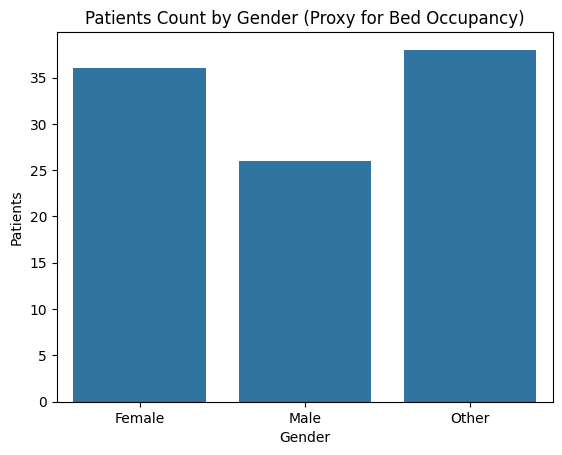

In [ ]:
sns.barplot(x = 'Gender', y = 'Patients', data = bed_occupancy)
plt.title("Patients Count by Gender (Proxy for Bed Occupancy)")
plt.show()

In [ ]:
occupancy_by_gender = df.groupby('gender')['length_of_stay'].sum().reset_index()
occupancy_by_gender

,gender,length_of_stay
0,Female,191
1,Male,138
2,Other,167


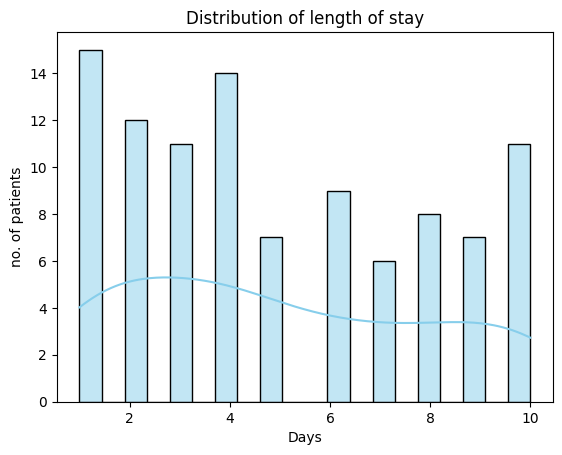

In [ ]:
#Length of Stay (LOS) Distribution
sns.histplot( df['length_of_stay'], bins = 20, kde =True, color = 'skyblue')
plt.title('Distribution of length of stay')
plt.xlabel('Days')
plt.ylabel('no. of patients')
plt.show()

In [ ]:
#Insight: Hospitals should focus on reducing long-stay cases to optimize bed utilization.

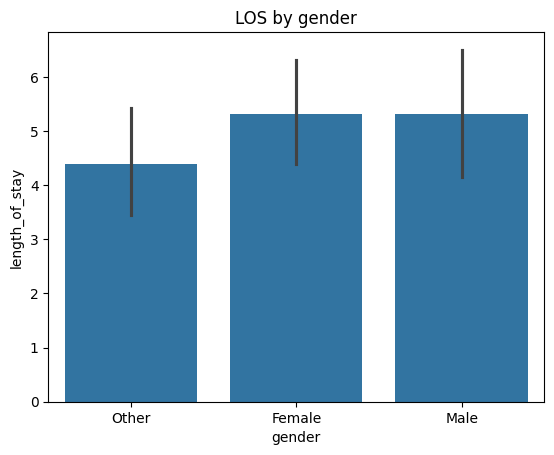

In [ ]:
# Gender-wise Patient Distribution
sns.barplot(x = 'gender', y = 'length_of_stay', data =df)
plt.title('LOS by gender')
plt.show()

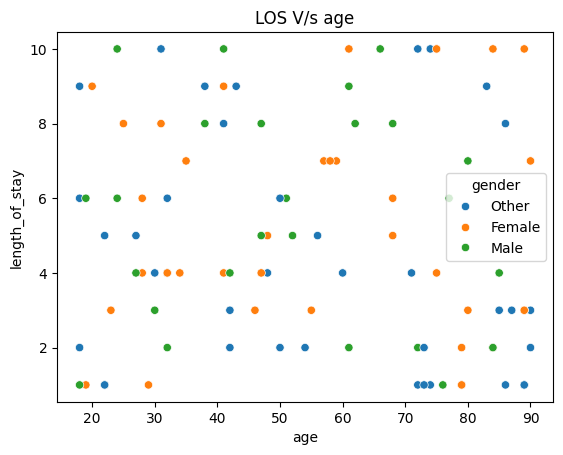

In [ ]:
sns.scatterplot(x = 'age', y = 'length_of_stay', hue = 'gender', data =df)
plt.title('LOS V/s age')
plt.show()

In [ ]:
# Readmission within 30 Days

# Majority of patients are NOT readmitted within 30 days.

/tmp/ipython-input-2861433898.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'readmitted_30_days', data = df, palette = 'coolwarm')


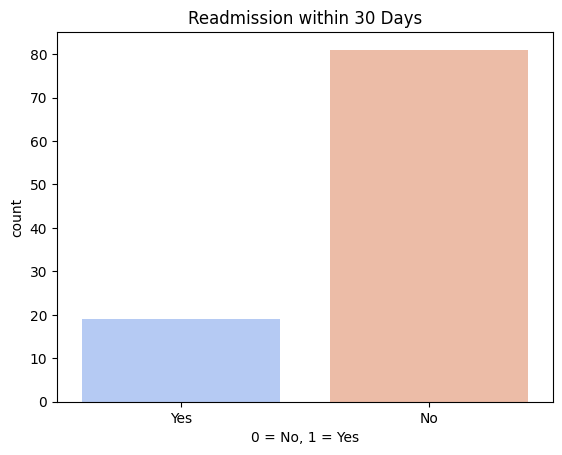

In [ ]:
sns.countplot(x = 'readmitted_30_days', data = df, palette = 'coolwarm')
plt.title("Readmission within 30 Days")
plt.xlabel("0 = No, 1 = Yes")
plt.show()

In [ ]:
# Readmission by Gender

# Readmission rates are similar across genders.

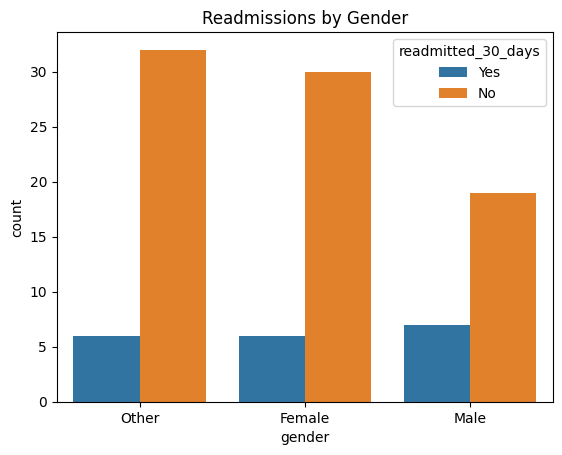

In [ ]:
sns.countplot(x='gender', hue='readmitted_30_days', data=df)
plt.title("Readmissions by Gender")
plt.show()


In [ ]:
df['readmitted_30_days'] = pd.to_numeric(df['readmitted_30_days'], errors='coerce')

In [ ]:
#Age vs Length of Stay

'''correlation Analysis (Heatmap Findings)
Positive Correlations:
Age ↗ LOS
Number of medications ↗ LOS'''

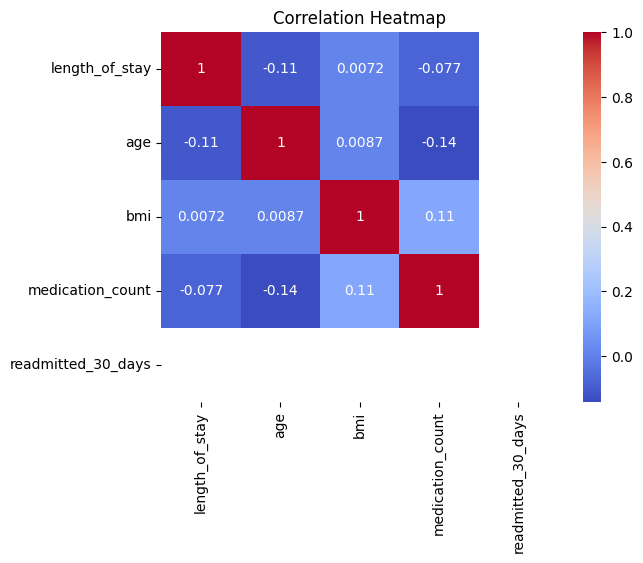

In [ ]:
corr = df[['length_of_stay', 'age', 'bmi', 'medication_count', 'readmitted_30_days']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
corr = df[['length_of_stay','age','bmi','medication_count','readmitted_30_days']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('correlation')
plt.show()

ValueError: could not convert string to float: 'Yes'